In [12]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [13]:
import pandas as pd
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [145]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [146]:
df.fillna(method="bfill",inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.5,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,40.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [147]:
x=df.iloc[:,9].values
y=df.iloc[:,11].values
x

array([36.6, 32.5, 32.5, ..., 30.6, 25.6, 26.2])

In [148]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x.reshape(-1,1),y)

In [149]:
x.shape

(9722, 1)

In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [151]:
#Decision tree
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [152]:
pred=classifier.predict(x_test)

In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.8529562982005141

In [154]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[844, 129],
       [157, 815]])

In [155]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       973
           1       0.86      0.84      0.85       972

    accuracy                           0.85      1945
   macro avg       0.85      0.85      0.85      1945
weighted avg       0.85      0.85      0.85      1945



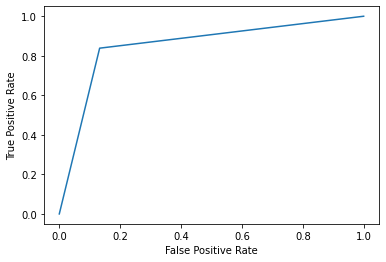

In [156]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

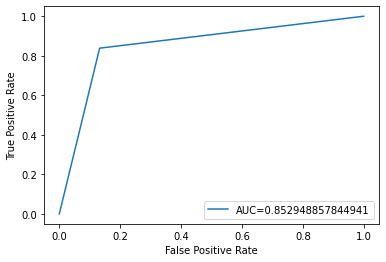

In [157]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

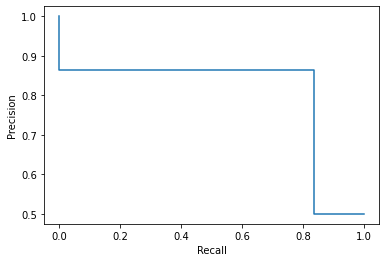

In [158]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [159]:
#knn
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [160]:
pred=classifier.predict(x_test)

In [161]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.7928020565552699

In [162]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[826, 147],
       [256, 716]])

In [163]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       973
           1       0.83      0.74      0.78       972

    accuracy                           0.79      1945
   macro avg       0.80      0.79      0.79      1945
weighted avg       0.80      0.79      0.79      1945



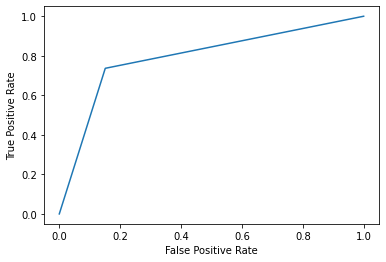

In [164]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

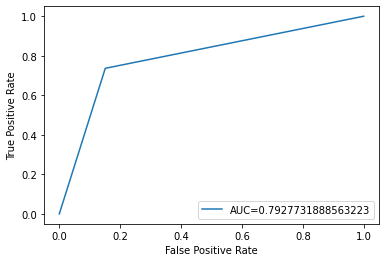

In [165]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

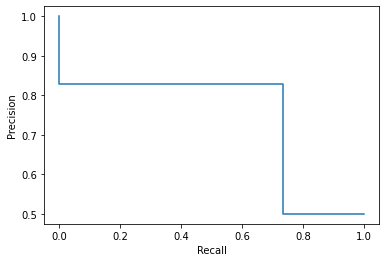

In [166]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [167]:
#svm
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [168]:
pred=classifier.predict(x_test)

In [169]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5737789203084833

In [170]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[342, 631],
       [198, 774]])

In [171]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.63      0.35      0.45       973
           1       0.55      0.80      0.65       972

    accuracy                           0.57      1945
   macro avg       0.59      0.57      0.55      1945
weighted avg       0.59      0.57      0.55      1945



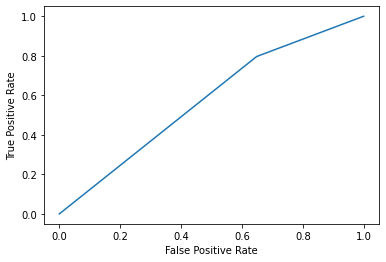

In [172]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

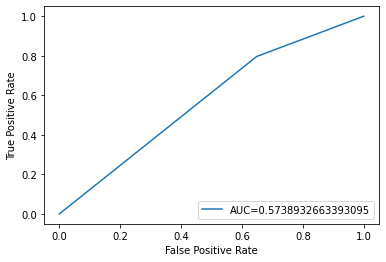

In [173]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

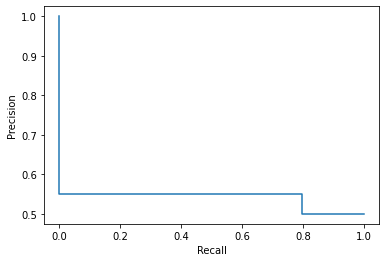

In [174]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [175]:
#random forest
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [176]:
pred=classifier.predict(x_test)

In [177]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.8493573264781491

In [178]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[849, 124],
       [169, 803]])

In [179]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       973
           1       0.87      0.83      0.85       972

    accuracy                           0.85      1945
   macro avg       0.85      0.85      0.85      1945
weighted avg       0.85      0.85      0.85      1945



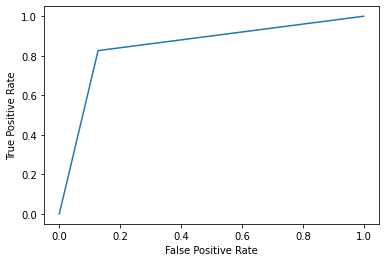

In [180]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

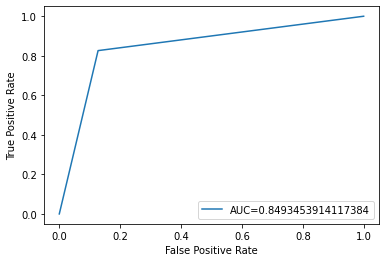

In [181]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

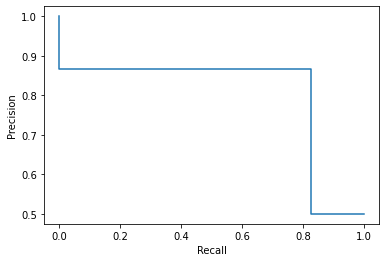

In [182]:

precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [183]:
#logistic regression
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression()  
classifier.fit(x_train, y_train)  

LogisticRegression()

In [184]:
pred=classifier.predict(x_test)

In [185]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5449871465295629

In [186]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[579, 394],
       [491, 481]])

In [187]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.54      0.60      0.57       973
           1       0.55      0.49      0.52       972

    accuracy                           0.54      1945
   macro avg       0.55      0.54      0.54      1945
weighted avg       0.55      0.54      0.54      1945



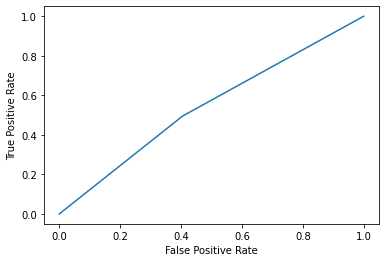

In [188]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

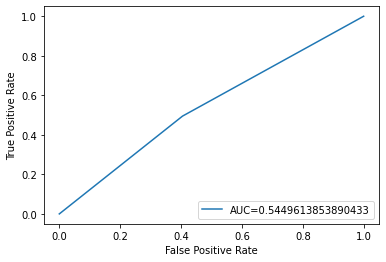

In [189]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

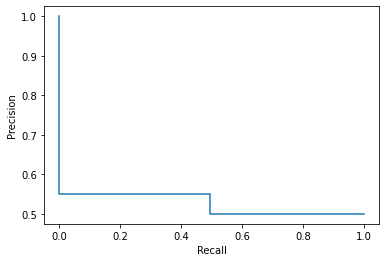

In [190]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [191]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [192]:
pred=classifier.predict(x_test)

In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5604113110539846

In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[407, 566],
       [289, 683]])

In [195]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.58      0.42      0.49       973
           1       0.55      0.70      0.62       972

    accuracy                           0.56      1945
   macro avg       0.57      0.56      0.55      1945
weighted avg       0.57      0.56      0.55      1945



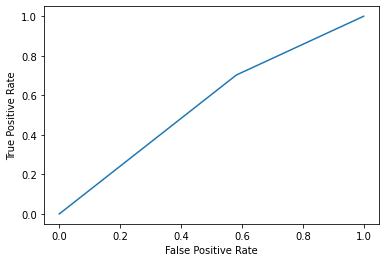

In [196]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

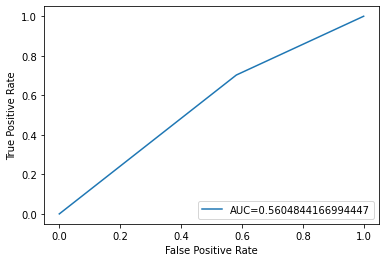

In [197]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

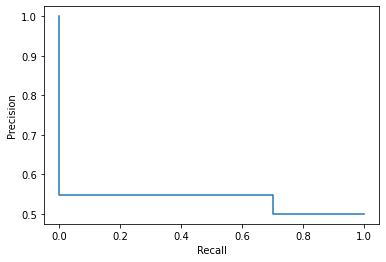

In [198]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [199]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [200]:
#fuzzy
from fcmeans import FCM
classifier = FCM(n_clusters=2)
classifier.fit(x)

In [201]:
pred=classifier.predict(x_test)

In [202]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.47403598971722366

In [203]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[315, 658],
       [365, 607]])

In [204]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.46      0.32      0.38       973
           1       0.48      0.62      0.54       972

    accuracy                           0.47      1945
   macro avg       0.47      0.47      0.46      1945
weighted avg       0.47      0.47      0.46      1945



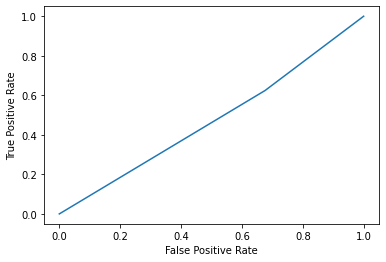

In [205]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

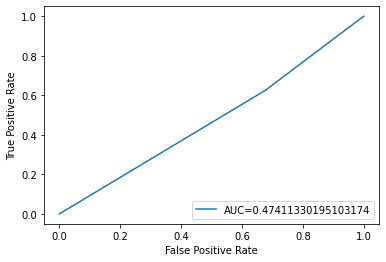

In [206]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

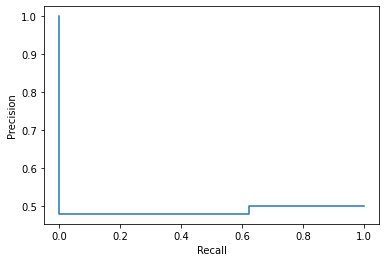

In [207]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [208]:
def new_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['dt'] = tree.DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  models['rf']=RandomForestClassifier()
  models['stacking'] = new_stacking()
  return models

In [209]:
from sklearn.ensemble import StackingClassifier
def new_stacking():
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('dt', tree.DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  level0.append(('rf',RandomForestClassifier() ))
  level1 = LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=6)
  return model

In [210]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def eval_model(model):
  cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=2)
  scr = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-2, error_score='raise')
  return scr

>lr 0.5471 (0.0220)
>knn 0.8046 (0.0193)
>dt 0.8549 (0.0140)
>svm 0.5812 (0.0168)
>bayes 0.5723 (0.0179)
>rf 0.8562 (0.0140)
>stacking 0.8554 (0.0139)


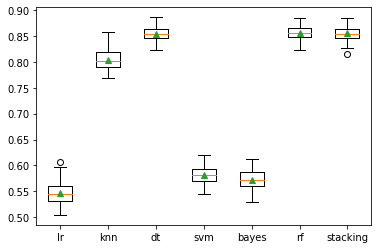

In [211]:
from numpy import mean
from numpy import std
X=x
Y=y
models = new_models()
results, names = list(), list()
for name, model in models.items():
  scr = eval_model(model)
  results.append(scr)
  names.append(name)
  print('>%s %.4f (%.4f)' % (name, mean(scr), std(scr)))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [212]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [213]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [214]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [215]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [216]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [217]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
244/244 [==============================] - 2s 2ms/step - loss: 3.7747 - accuracy: 0.4765
Epoch 2/50
244/244 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4877
Epoch 3/50
244/244 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.4907
Epoch 4/50
244/244 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.4948
Epoch 5/50
244/244 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4857
Epoch 6/50
244/244 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.5034
Epoch 7/50
244/244 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5066
Epoch 8/50
244/244 [==============================] - 1s 3ms/step - loss: 0.6957 - accuracy: 0.5026
Epoch 9/50
244/244 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.5160
Epoch 10/50
244/244 [==============================] - 1s 3ms/step - loss: 0.6942 - accuracy: 0.5245

In [218]:
y_pred = ann.predict(x_test)

61/61 [==============================] - 0s 945us/step


In [219]:
y_pred = (y_pred > 0.5)

In [220]:
import numpy as np
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [221]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)


array([[925,  48],
       [891,  81]])

In [222]:
accuracy_score(y_test, y_pred)

0.5172236503856041

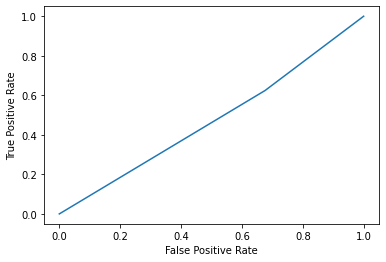

In [223]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

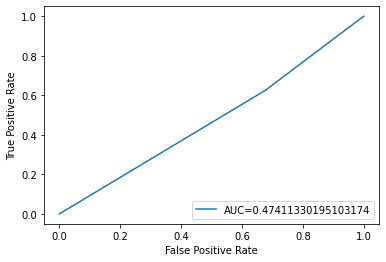

In [224]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

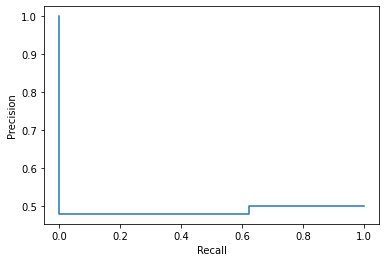

In [225]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()